# Scraping Cars24 for Tata Used Cars being sold in Mumbai

Install required Packages



In [2]:
!pip install selenium webdriver-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0


Install required Libraries

In [3]:
!apt-get update
!apt-get install -y wget unzip
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb || apt-get -fy install
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,809 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [5,031 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import numpy as np
import time

In [5]:
#by amith sahani
#Setup headless Chrome in Colab
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

service = Service(ChromeDriverManager().install())

In [6]:
driver = webdriver.Chrome(service=service, options=options)

In [7]:
#Open Cars24 website
url = "https://www.cars24.com/buy-used-tata-cars-mumbai/"
driver.get(url)
time.sleep(5)

#scroll to load all 37 cars
for _ in range(5):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight / 5);")
    time.sleep(2)

In [8]:
#get all cars
cars = driver.find_elements(By.XPATH, '//div[contains(@class, "styles_normalCardWrapper__qDZjq")]')
print(len(cars))
print(cars)

38
[<selenium.webdriver.remote.webelement.WebElement (session="6f83afec1207828fede3ba010e499576", element="f.9994F9E4B823438CB306A574B4F23A4C.d.798C92DF43553293FD0F737CA15E47B8.e.117")>, <selenium.webdriver.remote.webelement.WebElement (session="6f83afec1207828fede3ba010e499576", element="f.9994F9E4B823438CB306A574B4F23A4C.d.798C92DF43553293FD0F737CA15E47B8.e.118")>, <selenium.webdriver.remote.webelement.WebElement (session="6f83afec1207828fede3ba010e499576", element="f.9994F9E4B823438CB306A574B4F23A4C.d.798C92DF43553293FD0F737CA15E47B8.e.119")>, <selenium.webdriver.remote.webelement.WebElement (session="6f83afec1207828fede3ba010e499576", element="f.9994F9E4B823438CB306A574B4F23A4C.d.798C92DF43553293FD0F737CA15E47B8.e.120")>, <selenium.webdriver.remote.webelement.WebElement (session="6f83afec1207828fede3ba010e499576", element="f.9994F9E4B823438CB306A574B4F23A4C.d.798C92DF43553293FD0F737CA15E47B8.e.121")>, <selenium.webdriver.remote.webelement.WebElement (session="6f83afec1207828fede3ba

In [9]:
print(cars[0].get_attribute('innerHTML'))

<div class="sc-fLVwEd flTKoV"><div class="sc-eEPDDI vVhHL"><div class="sc-gutikT cORodr"><img alt="Tata Tiago-img" loading="lazy" width="220" height="120" decoding="async" data-nimg="1" class="shrinkOnTouch" style="color:transparent" src="https://media.cars24.com/hello-ar/dev/uploads/no_bg/a538a750-5be6-11f0-bd3e-02ede2007fbe/686cf1eca783acd0c21b53b2/64b07dda-133c-4166-b3df-bc5f19d0bb5a/slot/2-Right-Front-Diagonal.png?w=240&amp;format=auto&amp;dpr=2&amp;pad=48,0,0,0&amp;trim-color=auto"></div><div class="sc-huvEkS kqKtdO"><div class="styles_outer__ZH1Cg"><button><img alt="Add to wishlist" loading="lazy" width="24" height="24" decoding="async" data-nimg="1" class="styles_icon__vn_BC shrinkOnTouch" style="color:transparent" src="https://assets.cars24.com/production/catalog-web-in/250715133435/_next/static/media/icon-heart-empty.479d2b8c.svg"></button></div></div></div></div><div class="styles_contentWrap__9oSrl"><div class="styles_outer__NTVth"><div class="sc-bSlUec leZNkK"><div class="s

In [10]:
data = []

for car in cars:
    try:
        title_parts = car.find_elements(By.XPATH, './/span[contains(@class, "sc-czgmHJ glJeWQ")]')
        title_parts.extend(car.find_elements(By.XPATH, './/span[contains(@class, "sc-braxZu kjFjan")]'))

        if len(title_parts) >= 2:
            title = title_parts[0].text + " " + title_parts[1].text
        else:
            title = title_parts[0].text

        price = None
        location = None
        detail_elements = car.find_elements(By.XPATH, './/p[contains(@class, "sc-braxZu kvfdZL")]')

        if len(detail_elements) == 0:
          detail_elements = car.find_elements(By.XPATH, './/p[contains(@class, "sc-czgmHJ ctvwTc")]')
          km = detail_elements[0].text
          fuel = detail_elements[1].text
          transmission = detail_elements[2].text
          owner_text = detail_elements[3].get_attribute('innerHTML')
          # Extract numeric part and convert to float here
          owner = float(''.join(filter(str.isdigit, owner_text))) if any(char.isdigit() for char in owner_text) else np.nan


        elif len(detail_elements) > 0:
            km = detail_elements[0].text
            fuel = detail_elements[1].text
            transmission = detail_elements[2].text
            owner_text = detail_elements[3].get_attribute('innerHTML')
            # Extract numeric part and convert to float here
            owner = float(''.join(filter(str.isdigit, owner_text))) if any(char.isdigit() for char in owner_text) else np.nan

        else:
            km = "Not Found"
            fuel = "Not Found"
            transmission = "Not Found"
            owner = np.nan # Use NaN for Not Found
            detail_elements = "Not Found"

        try:
            price = car.find_element(By.XPATH, './/p[contains(@class, "sc-braxZu cyPhJl")]').text
        except NoSuchElementException:
            pass

        if not price:
            try:
                price = car.find_element(By.XPATH, './/p[contains(@class, "sc-czgmHJ frDqEi")]').text
            except NoSuchElementException:
                price = "Not Found"

        try:
            location = car.find_element(By.XPATH, './/p[contains(@class, "sc-braxZu lmmumg")]').text
        except NoSuchElementException:
            pass

        if not location:
            try:
                location = car.find_element(By.XPATH, './/p[contains(@class, "sc-czgmHJ WaIhv")]').text
            except NoSuchElementException:
                location = "Not Found"

    except Exception as e:
      print("Skipping a car due to error:", e)

    finally:
      data.append({
            "Title": title,
            "Year": title.split()[0],
            "Price": price,
            "Kilometers Driven": km,
            "Fuel Type": fuel,
            "Transmission": transmission,
            "Number of Owners": owner, # Use the numeric owner value
            "Location": location,
        })

In [11]:
df = pd.DataFrame(data)
driver.quit()

# Shift index to start from 1
df.index += 1

print(df)

# Save with shifted index (but do NOT save it as a column)
df.to_csv("raw_data.csv", encoding="utf-8-sig", index=False)


                Title  Year        Price Kilometers Driven Fuel Type  \
1     2022 Tata Tiago  2022   ₹6.12 lakh         38.49k km       CNG   
2     2019 Tata NEXON  2019   ₹7.30 lakh         53.00k km    Petrol   
3     2022 Tata Tiago  2022   ₹5.87 lakh         64.37k km       CNG   
4     2022 Tata NEXON  2022   ₹9.75 lakh         16.35k km    Petrol   
5     2021 Tata NEXON  2021   ₹7.55 lakh         14.56k km    Petrol   
6     2023 Tata PUNCH  2023   ₹7.85 lakh         10.02k km       CNG   
7     2018 Tata NEXON  2018   ₹5.95 lakh         39.52k km    Petrol   
8     2024 Tata NEXON  2024   ₹8.10 lakh            377 km    Petrol   
9    2022 Tata ALTROZ  2022   ₹6.18 lakh         16.86k km    Diesel   
10    2017 Tata Tiago  2017   ₹3.45 lakh         61.32k km    Petrol   
11    2022 Tata Tiago  2022   ₹5.28 lakh         35.84k km       CNG   
12    2018 Tata Tiago  2018   ₹3.70 lakh         51.13k km    Petrol   
13  2021 Tata Harrier  2021  ₹13.48 lakh         80.26k km    Di

In [12]:
def convert_kms(val):
    if isinstance(val, str):
        val = val.lower().replace(' km', '').replace(',', '').strip()
        if 'k' in val:
            return float(val.replace('k', '')) * 1000
        else:
            return float(val)
    return np.nan

df['Kilometers Driven'] = df['Kilometers Driven'].apply(convert_kms)

# Summary stats
print(df['Kilometers Driven'].describe())

count       38.000000
mean     37808.605263
std      22710.612601
min        377.000000
25%      21020.000000
50%      35110.000000
75%      51197.500000
max      93500.000000
Name: Kilometers Driven, dtype: float64


# EDA PROCESS

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Counting missing values (if any)

In [14]:
print(df.isnull().sum())

Title                0
Year                 0
Price                0
Kilometers Driven    0
Fuel Type            0
Transmission         0
Number of Owners     0
Location             0
dtype: int64


### UNIVARIATE ANALYSIS

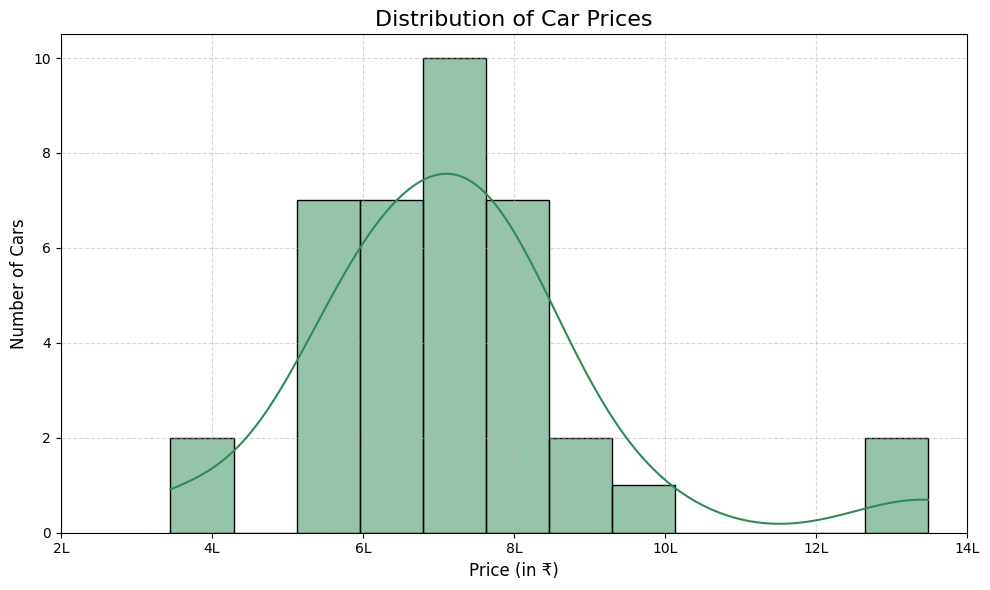

In [15]:
#EDA PROCESS
# UNIVARIATE ANALYSIS
# Price Distribution

df['Price'] = (
    df['Price']
    .str.replace('₹', '', regex=False)
    .str.replace('lakh', '', regex=False)
    .str.strip()
    .astype(float) * 100000
)

price_data = df['Price'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(price_data, kde=True, bins=12, color='seagreen')

plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price (in ₹)', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)

locs, _ = plt.xticks()
plt.xticks(ticks=locs, labels=[f"{int(x/1e5)}L" for x in locs])

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

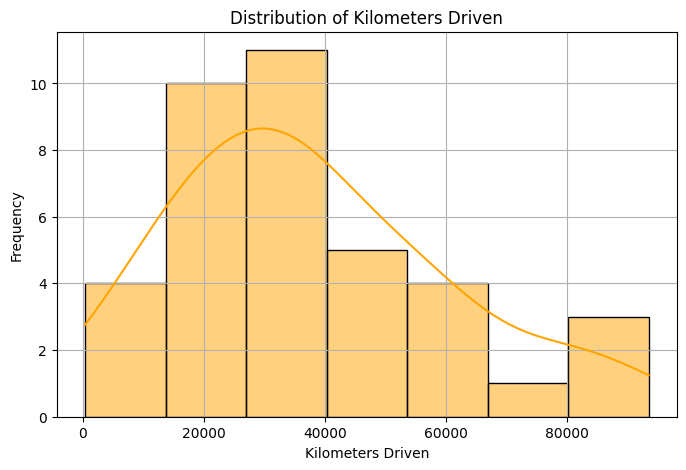

In [16]:
# Kilometers Driven Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Kilometers Driven'], kde=True, color='orange')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

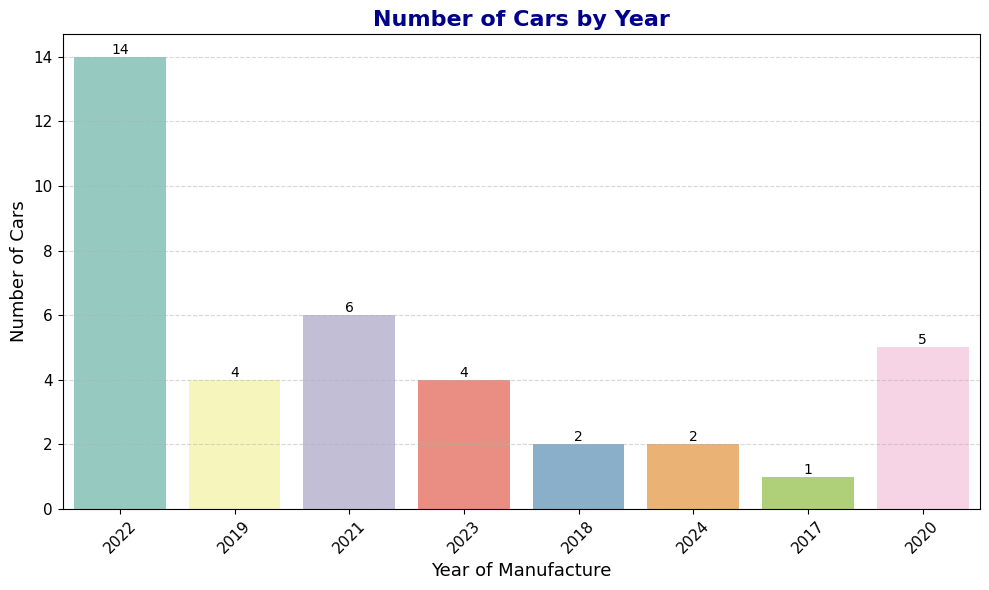

In [17]:
# Year of Manufacture
plt.figure(figsize=(10, 6))

# Use 'Set3' or 'hls' for a more colorful palette
sns.countplot(data=df, x='Year', hue='Year', palette='Set3', legend=False)

# Titles and labels
plt.title('Number of Cars by Year', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Year of Manufacture', fontsize=13)
plt.ylabel('Number of Cars', fontsize=13)

# Aesthetic enhancements
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Optional: Add value labels on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

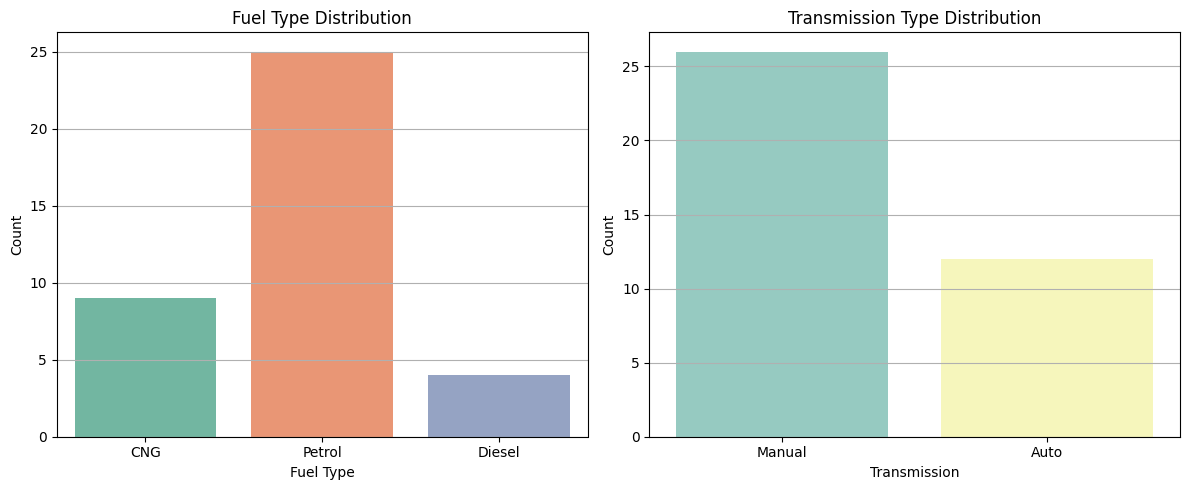

In [18]:
# Fuel Type & Transmission Type
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='Fuel Type', hue='Fuel Type', ax=axs[0], palette='Set2', legend=False)
axs[0].set_title('Fuel Type Distribution')
axs[0].set_ylabel('Count')
axs[0].grid(True, axis='y')

sns.countplot(data=df, x='Transmission', hue='Transmission', ax=axs[1], palette='Set3', legend=False)
axs[1].set_title('Transmission Type Distribution')
axs[1].set_ylabel('Count')
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

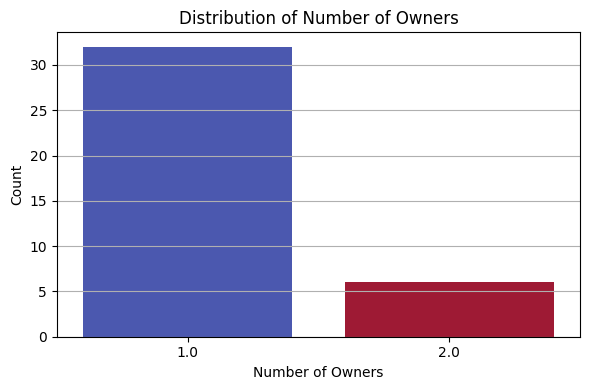

In [19]:
# Number of Owners
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Number of Owners', hue='Number of Owners', palette='coolwarm', legend=False)
plt.title('Distribution of Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS

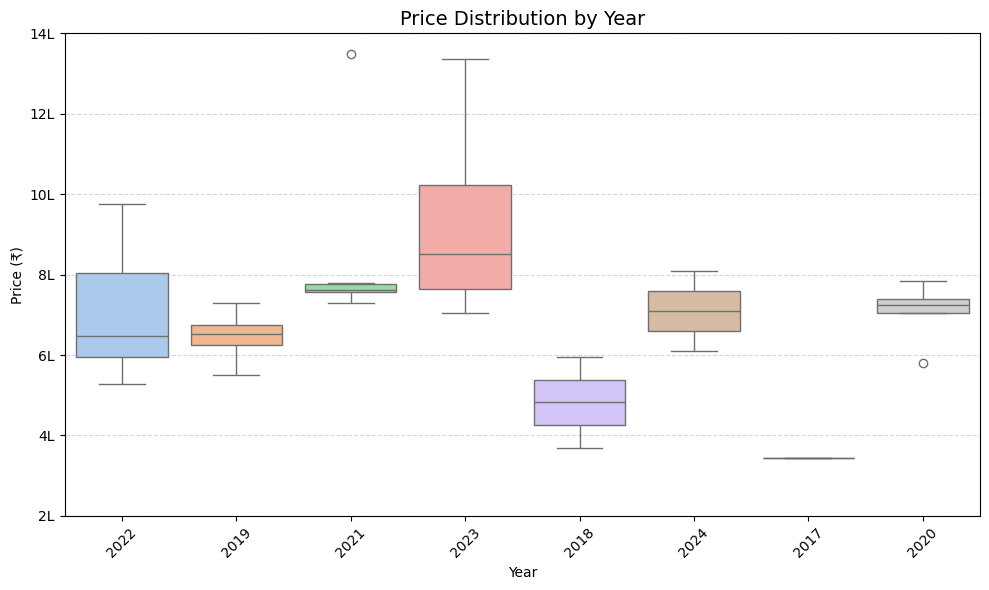

In [20]:
#Bivariate Analysis
#Price vs Year
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='Price', hue='Year', palette='pastel', legend=False)

plt.title('Price Distribution by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)

locs, _ = plt.yticks()
plt.yticks(ticks=locs, labels=[f"{int(x/1e5)}L" for x in locs])

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

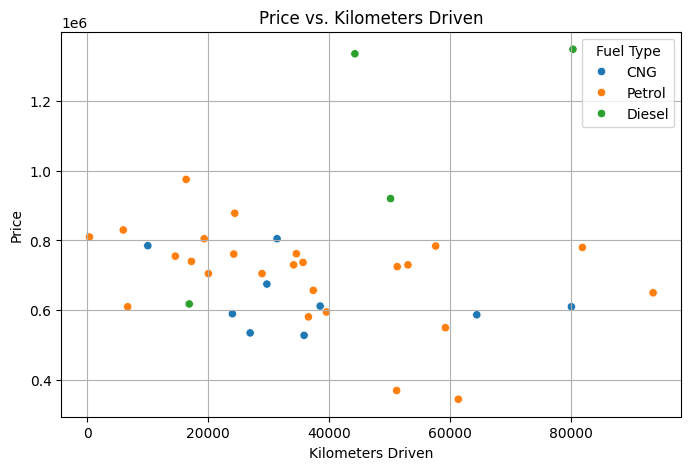

In [21]:
# Price vs Kilometers Driven
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Kilometers Driven', y='Price', hue='Fuel Type')
plt.title('Price vs. Kilometers Driven')
plt.grid(True)
plt.show()

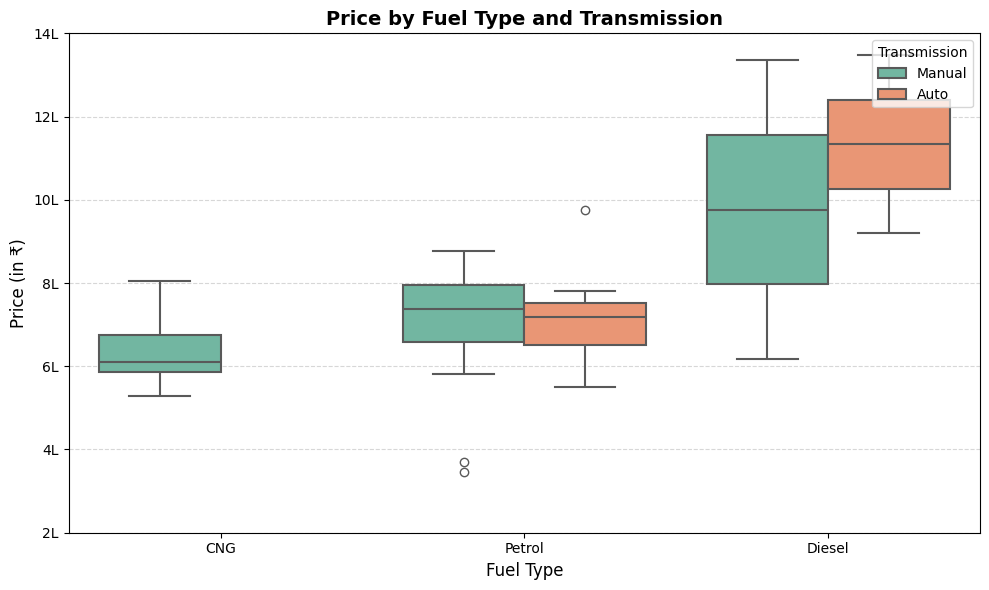

In [22]:
#Price vs Fuel Type & Transmission
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Fuel Type',
    y='Price',
    hue='Transmission',
    palette='Set2',
    linewidth=1.5
)

plt.title('Price by Fuel Type and Transmission', fontsize=14, weight='bold')
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price (in ₹)', fontsize=12)

locs, _ = plt.yticks()
plt.yticks(ticks=locs, labels=[f"{int(x/1e5)}L" for x in locs])

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Transmission', title_fontsize='10', fontsize='10', loc='upper right')
plt.tight_layout()
plt.show()

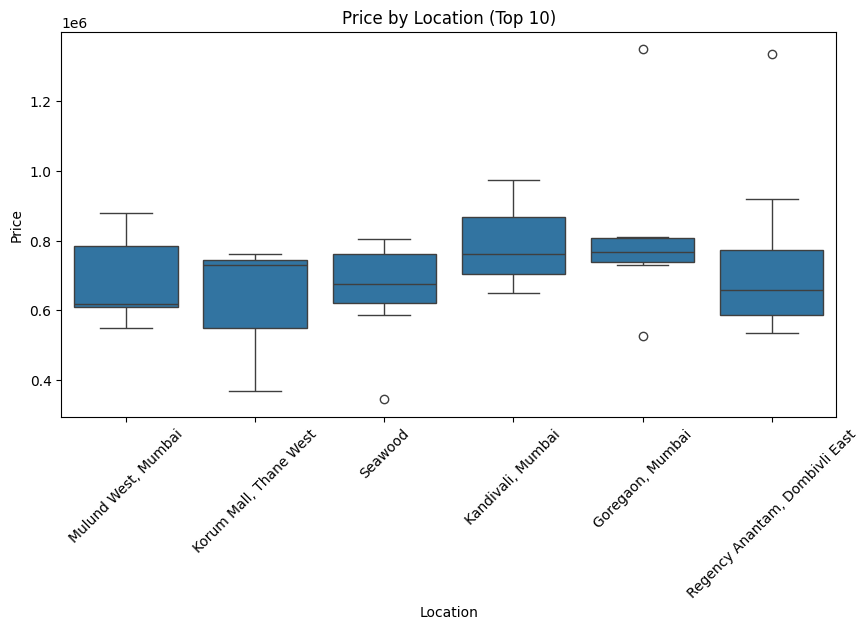

In [23]:
#Price vs Location

top_locations = df['Location'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 5))
sns.boxplot(x='Location', y='Price', data=df[df['Location'].isin(top_locations)])
plt.title('Price by Location (Top 10)')
plt.xticks(rotation=45)
plt.show()


Transmission  Auto  Manual
Fuel Type                 
CNG              0       9
Diesel           2       2
Petrol          10      15


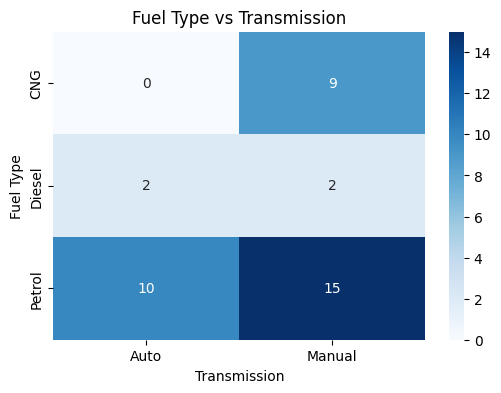

In [24]:
#--- fuel type vs transmission type
cross_tab = pd.crosstab(df['Fuel Type'], df['Transmission'])
print(cross_tab)

# Plot as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Fuel Type vs Transmission')
plt.show()

Transmission      Auto  Manual
Number of Owners              
1.0                 11      21
2.0                  1       5


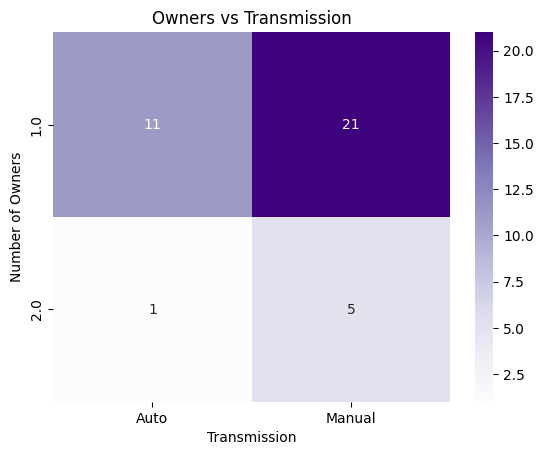

In [25]:
#--- owners vs transmission
cross_tab = pd.crosstab(df['Number of Owners'], df['Transmission'])
print(cross_tab)

sns.heatmap(cross_tab, annot=True, cmap='Purples', fmt='d')
plt.title('Owners vs Transmission')
plt.show()

### OUTLIERS DETECTION

In [26]:
# Columns where IQR method is applicable
iqr_columns = ['Year', 'Price', 'Kilometers Driven', 'Number of Owners']

# Clean and convert 'Number of Owners' to numeric
def clean_number_of_owners(col):
    return col.str.extract('(\d+)').astype(float)

# Apply cleaning if needed
if df['Number of Owners'].dtype == 'object':
    df['Number of Owners'] = clean_number_of_owners(df['Number of Owners'])

# IQR function
def detect_outliers_iqr(df, column):
    if df[column].dtype not in ['int64', 'float64']:
        print(f"Skipping non-numeric column: {column}")
        return None
    col_data = df[column].dropna()  # Remove NaNs for calculation
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column}: Found {len(outliers)} outliers")
    return outliers

# Run IQR detection
for col in iqr_columns:
    detect_outliers_iqr(df, col)


Skipping non-numeric column: Year
Price: Found 3 outliers
Kilometers Driven: Found 0 outliers
Number of Owners: Found 6 outliers


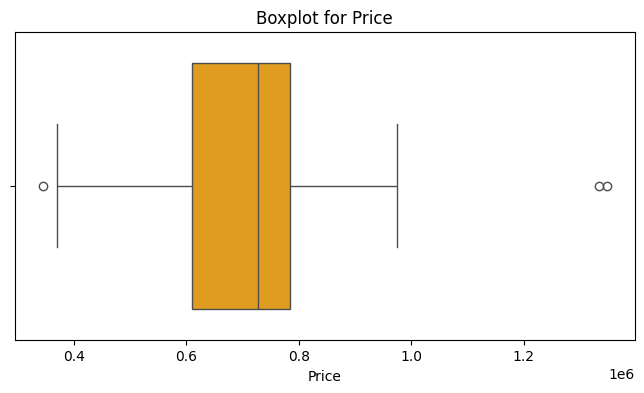

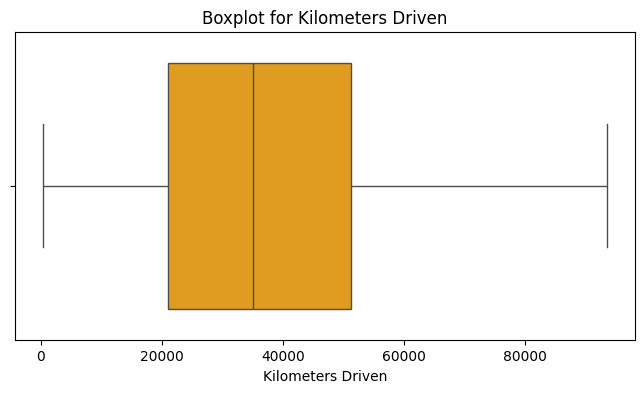

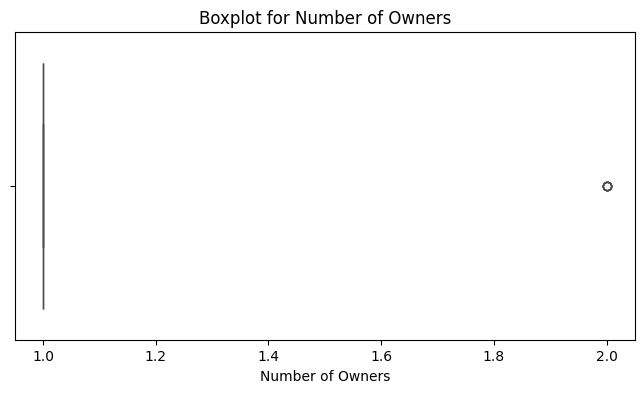

In [27]:
for col in iqr_columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color='orange')
        plt.title(f'Boxplot for {col}')
        plt.show()


### FEATURE ENGINEERING

In [28]:
# Step 1: Create Car Age
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') # Convert 'Year' to numeric
df['Car Age'] = 2025 - df['Year']

# Step 2: Create Fuel Type_Diesel using one-hot encoding
df['Fuel Type_Diesel'] = pd.get_dummies(df['Fuel Type'], drop_first=False)['Diesel']

# Step 3: Move the new columns to the end
columns = [col for col in df.columns if col not in ['Car Age', 'Fuel Type_Diesel']]
df = df[columns + ['Car Age', 'Fuel Type_Diesel']]

# Step 4: Export to CSV without serial/index column
df.to_csv('final_dataset.csv', index=False)

print("Saved as 'final_dataset.csv'")

Saved as 'final_dataset.csv'


In [29]:
# Remove this cell before Submitting for Review.
df = pd.read_csv('final_dataset.csv')
df.head()

,Title,Year,Price,Kilometers Driven,Fuel Type,Transmission,Number of Owners,Location,Car Age,Fuel Type_Diesel
0,2022 Tata Tiago,2022,612000.0,38490.0,CNG,Manual,1.0,"Mulund West, Mumbai",3,False
1,2019 Tata NEXON,2019,730000.0,53000.0,Petrol,Auto,1.0,"Korum Mall, Thane West",6,False
2,2022 Tata Tiago,2022,587000.0,64370.0,CNG,Manual,1.0,Seawood,3,False
3,2022 Tata NEXON,2022,975000.0,16350.0,Petrol,Auto,1.0,"Kandivali, Mumbai",3,False
4,2021 Tata NEXON,2021,755000.0,14560.0,Petrol,Auto,1.0,"Goregaon, Mumbai",4,False


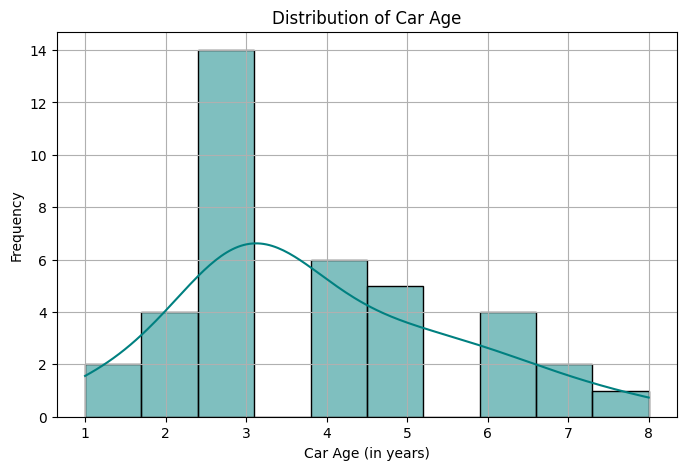

In [30]:
# 1. Car Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Car Age'], kde=True, bins=10, color='teal')
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (in years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipython-input-31-4083336170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Car Age', y='Price', palette='YlGnBu')


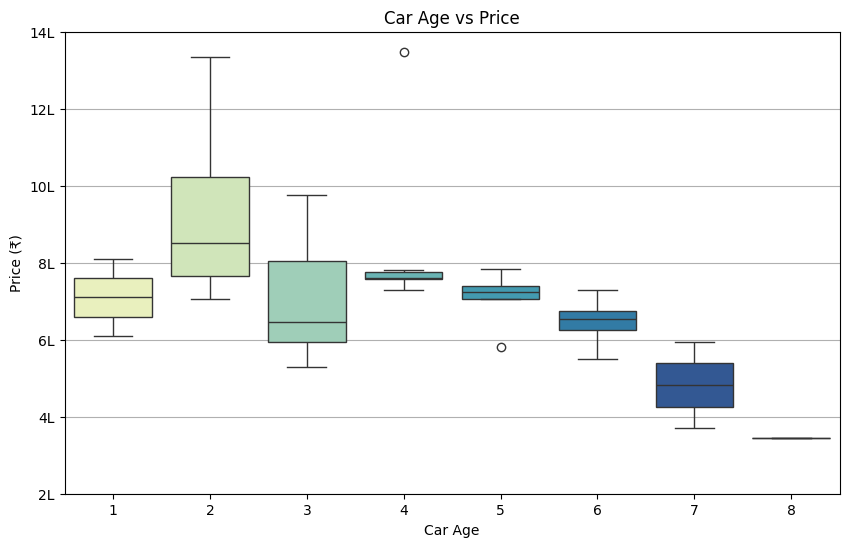

In [31]:
# 2. Car Age vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Car Age', y='Price', palette='YlGnBu')
plt.title('Car Age vs Price')
plt.xlabel('Car Age')
plt.ylabel('Price (₹)')
locs, _ = plt.yticks()
plt.yticks(ticks=locs, labels=[f"{int(x/1e5)}L" for x in locs])
plt.grid(True, axis='y')
plt.show()

/tmp/ipython-input-32-1832883499.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby(['Car Age Bucket', 'Fuel Type'])['Price'].mean().reset_index()


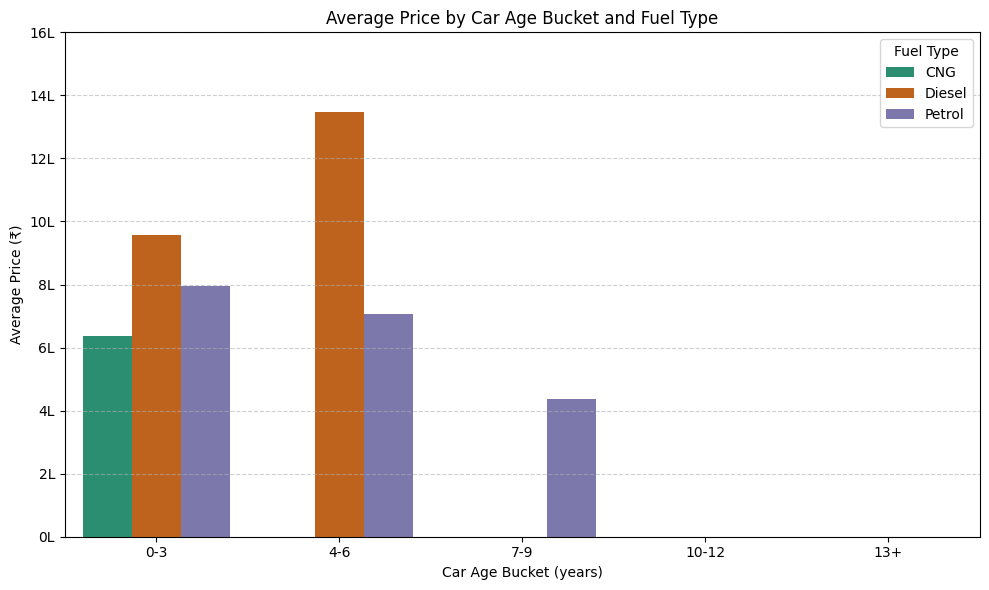

In [32]:
# 3. Mean Price by Fuel Type and Car Age Buckets
df['Car Age Bucket'] = pd.cut(df['Car Age'], bins=[0, 3, 6, 9, 12, 20], labels=['0-3','4-6','7-9','10-12','13+'])

avg_price = df.groupby(['Car Age Bucket', 'Fuel Type'])['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, x='Car Age Bucket', y='Price', hue='Fuel Type', palette='Dark2')

plt.title('Average Price by Car Age Bucket and Fuel Type')
plt.xlabel('Car Age Bucket (years)')
plt.ylabel('Average Price (₹)')
locs, _ = plt.yticks()
plt.yticks(ticks=locs, labels=[f"{int(x/1e5)}L" for x in locs])
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()